In [8]:
# import necessary libraries

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [187]:
# define the region:

def f1(x):
    if x<=19:
        return 0.33*19+14.3
    else:
        return min(0.33*x+14.3,22)
    
def f2(x):
    return max(25,0.33*x+21.8)

In [189]:
x=np.arange(5,27,0.1) # x for plotting the lines
# y for the lines
y1=[f1(xi) for xi in x]
y2=[f2(xi) for xi in x]

In [190]:
# define plot range
xmin = 5
xmax = 27
ymin = 20
ymax = 31

In [191]:
n=int(1e5) # number of random samples to generate


# generate data
xdata = (xmin + (xmax-xmin) * np.random.rand(1,n))[0]
ydata = (ymin + (ymax-ymin) * np.random.rand(1,n))[0]

In [192]:
# determine whether each data point is in or out, split into two datasets

# create empty lists
xdata_in=[]
ydata_in=[]

xdata_out=[]
ydata_out=[]

# process data
for i in range(0,n):
    if (ydata[i] >= f1(xdata[i])) and (ydata[i]<= f2(xdata[i])):
        xdata_in.append(xdata[i])
        ydata_in.append(ydata[i])
    else:
        xdata_out.append(xdata[i])
        ydata_out.append(ydata[i])
        
# count data points       
n_in = len(xdata_in)
n_out = len(xdata_out)
    

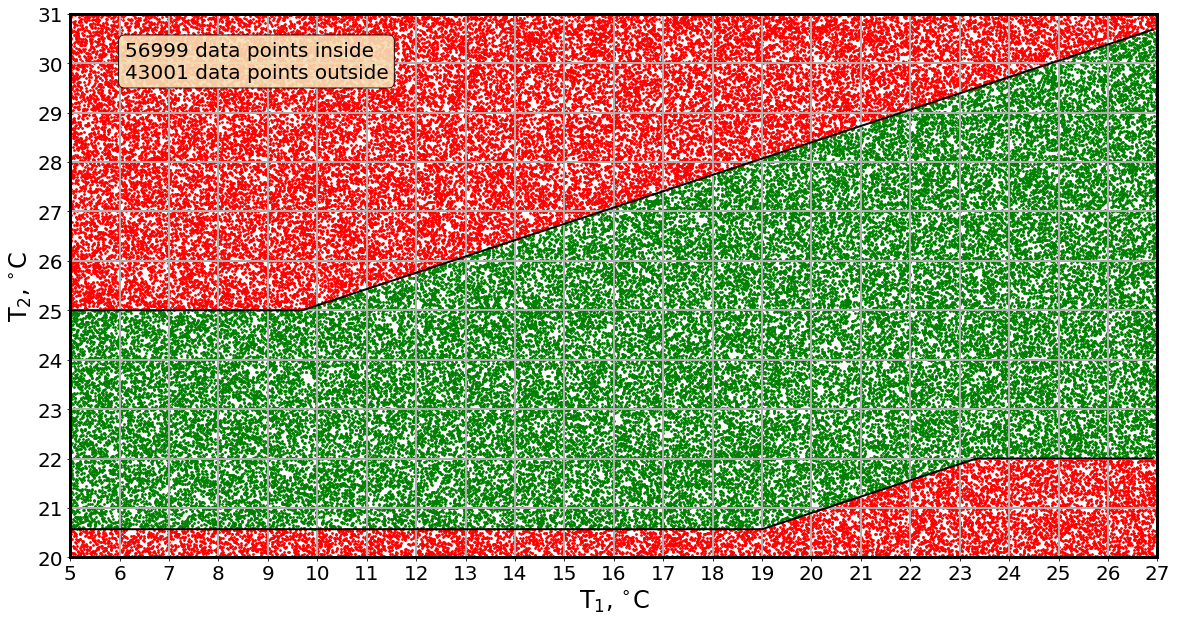

In [195]:
# plot everything

fig, ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

# plot lines
plt.plot(x,y1, color='black',linewidth=2)
plt.plot(x,y2, color='black',linewidth=2)

# plot data points
plt.scatter(xdata_in,ydata_in,color = 'green',s = 3)  # data points inside the region
plt.scatter(xdata_out,ydata_out,color ='red', s = 3) # data points outside the region

# x and y limits
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)


# format axes
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)


# format ticks
plt.xticks(np.arange(xmin,xmax+1),fontsize=20)
plt.yticks(np.arange(ymin,ymax+1),fontsize=20)

# add grid lines
plt.grid(True,linewidth=2)

# label axes
plt.xlabel(r'T$_1$, $^{\circ}$C',fontsize=24)
plt.ylabel(r'T$_2$, $^{\circ}$C',fontsize=24)


# textbox with number of points inside/outside
textstr = '\n'.join((
    r'%d data points inside' % (n_in, ),
    r'%d data points outside' % (n_out, )
    ))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=20,
        verticalalignment='top',bbox=props)

# save to file
plt.savefig('figure.png') 